# IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from IPython.display import Image
Image(url= "https://res.cloudinary.com/practicaldev/image/fetch/s--psVH86Cx--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/ci551zpjvsr4yopg9f16.jpeg")


# IMPORT DATASET

In [7]:
train_dataset=pd.read_csv("C:\\Users\\sairam\\OneDrive\\Desktop\\PROJECT\\Stock csv\\Google_Stock_Price_Train.csv")

# PERFORMING EDA 

In [8]:
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [9]:
train_dataset.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
X=train_dataset.iloc[:,1:2].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)

C:\Users\sairam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
X_train=[]
Y_train=[]
for i in range(60 ,1258):
    X_train.append(X[i-60:i,0])
    Y_train.append(X[i,0])
    

In [13]:
X.shape

(1258, 1)

In [14]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [15]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [16]:
X_train.shape

(1198, 60, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
!pip install keras

In [19]:
!pip install tensorflow

In [20]:
regressor=Sequential()
regressor.add(LSTM(units=50 , return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50 , return_sequences=True))
regressor.add(Dropout(0.1))


In [21]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))


In [22]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [51]:
regressor.fit(X_train,Y_train,epochs=200,batch_size=32)

Epoch 1/200
38/38 [==============================] - 3s 74ms/step - loss: 0.0016
Epoch 2/200
38/38 [==============================] - 3s 69ms/step - loss: 0.0015
Epoch 3/200
38/38 [==============================] - 3s 69ms/step - loss: 0.0018
Epoch 4/200
38/38 [==============================] - 3s 70ms/step - loss: 0.0015
Epoch 5/200
38/38 [==============================] - 3s 71ms/step - loss: 0.0015
Epoch 6/200
38/38 [==============================] - 3s 72ms/step - loss: 0.0016
Epoch 7/200
38/38 [==============================] - 3s 73ms/step - loss: 0.0016
Epoch 8/200
38/38 [==============================] - 3s 72ms/step - loss: 0.0015
Epoch 9/200
38/38 [==============================] - 3s 72ms/step - loss: 0.0015
Epoch 10/200
38/38 [==============================] - 3s 72ms/step - loss: 0.0014
Epoch 11/200
38/38 [==============================] - 3s 72ms/step - loss: 0.0015
Epoch 12/200
38/38 [==============================] - 3s 74ms/step - loss: 0.0015
Epoch 13/200
38/38 [=====

38/38 [==============================] - 3s 79ms/step - loss: 9.1033e-04
Epoch 197/200
38/38 [==============================] - 3s 80ms/step - loss: 8.5866e-04
Epoch 198/200
38/38 [==============================] - 3s 83ms/step - loss: 9.3418e-04
Epoch 199/200
38/38 [==============================] - 3s 79ms/step - loss: 0.0011
Epoch 200/200
38/38 [==============================] - 3s 80ms/step - loss: 8.7179e-04


# TESTING ON CUSTOM DATA

In [52]:
test_dataset=pd.read_csv("C:\\Users\\sairam\\OneDrive\\Desktop\\PROJECT\\Stock csv\\Google_Stock_Price_Test.csv")

In [53]:
test_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [54]:
test_dataset.shape

(20, 6)

In [55]:
real_stock_price=test_dataset.iloc[:,1:2].values

In [56]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [57]:
total_dataset=pd.concat((train_dataset['Open'],test_dataset['Open']),axis=0)

In [58]:
total_dataset.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [59]:
total_dataset.shape

(1278,)

In [60]:
inputs=total_dataset[len(total_dataset)-len(test_dataset)-60:].values

In [61]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [62]:
inputs=inputs.reshape(-1,1)

In [63]:
inputs.shape

(80, 1)

In [64]:
inputs=sc.transform(inputs)

In [65]:
inputs[0]

array([0.9299055])

In [66]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

In [67]:
X_test.shape

(20, 60)

In [68]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [69]:
X_test.shape

(20, 60, 1)

In [70]:
predicted_stock_price=regressor.predict(X_test)

1/1 [==============================] - 0s 40ms/step


In [71]:
predicted_stock_price

array([[0.94652337],
       [0.9421319 ],
       [0.95314336],
       [0.9514691 ],
       [0.96158636],
       [0.97682846],
       [0.97928727],
       [0.9754056 ],
       [0.9782058 ],
       [0.9796568 ],
       [0.9793713 ],
       [0.9780894 ],
       [0.9775443 ],
       [0.980132  ],
       [0.9811722 ],
       [0.9998083 ],
       [1.010461  ],
       [1.0204321 ],
       [1.0179868 ],
       [0.99496937]], dtype=float32)

In [72]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [73]:
predicted_stock_price

array([[787.9331 ],
       [785.5724 ],
       [791.4917 ],
       [790.59174],
       [796.03033],
       [804.2239 ],
       [805.54565],
       [803.459  ],
       [804.9643 ],
       [805.74426],
       [805.5908 ],
       [804.90173],
       [804.6087 ],
       [805.9997 ],
       [806.5589 ],
       [816.5769 ],
       [822.30334],
       [827.66345],
       [826.34894],
       [813.9757 ]], dtype=float32)

# VISUALIZATION

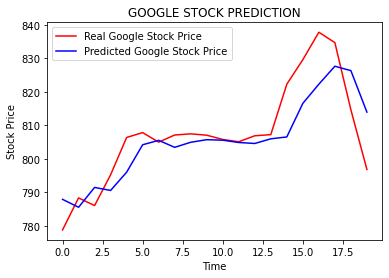

In [74]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('GOOGLE STOCK PREDICTION')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# THANK YOU